Assignment 03
Out: 11/06 19:00
Due: 11/20 19:00

Instructions
Collaboration:

Collaboration on solving the assignment is allowed, after you have thought about the problem sets on your own. It is also OK to get clarification (but not solutions) from online resources, again after you have thought about the problem sets on your own.

There are two requirements for collaboration:

Cite your collaborators fully and completely (e.g., “XXX explained to me what is asked in problem set 3”). Or cite online resources (e.g., “I got inspired by reading XXX”) that helped you.

Write your scripts and report independently - the scripts and report must come from you only.

Submitting your assignment:

Please write a report PS3.pdf.

Create a jupyter notebook named PS3.ipynb.

Upload your jupyter notebook and report to your Github ESE5023_Assignments_XXX repository (where XXX is your SUSTech ID) before the due time.

Late Submission:

Late submissions will not receive any credit. The submission time will be determined based on your latest GitHub file records.

1. Global methane levels from 2002
Methane (CH4) is a naturally occurring Greenhouse Gas (GHG), but one whose abundance has been increased substantially above its pre-industrial value by human activities, primarily because of agricultural emissions (e.g., rice production, ruminants) and fossil fuel production and use. A clear annual cycle is largely due to seasonal wetland emissions.

Atmospheric methane abundance is indirectly observed by various satellite instruments. These instruments measure spectrally resolved near-infrared and infrared radiation reflected or emitted by the Earth and its atmosphere. In the measured signal, molecular absorption signatures from methane and constituent gasses can be identified. It is through analysis of those absorption lines in these radiance observations that the averaged methane abundance in the sampled atmospheric column can be determined.

For this problem set, methane levels have been determined by applying several algorithms to different satellite instruments. Download the netCDF4 file (200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc) here, which contains monthly-averaged methane levels (xch4) in the unit of ppb at each 5° (lon) x 5° (lat) grid over the globe from 2003-01 to 2020-06.

1.1 [5 points] Compute methane climatology for each month, and plot your results in 12 panels.

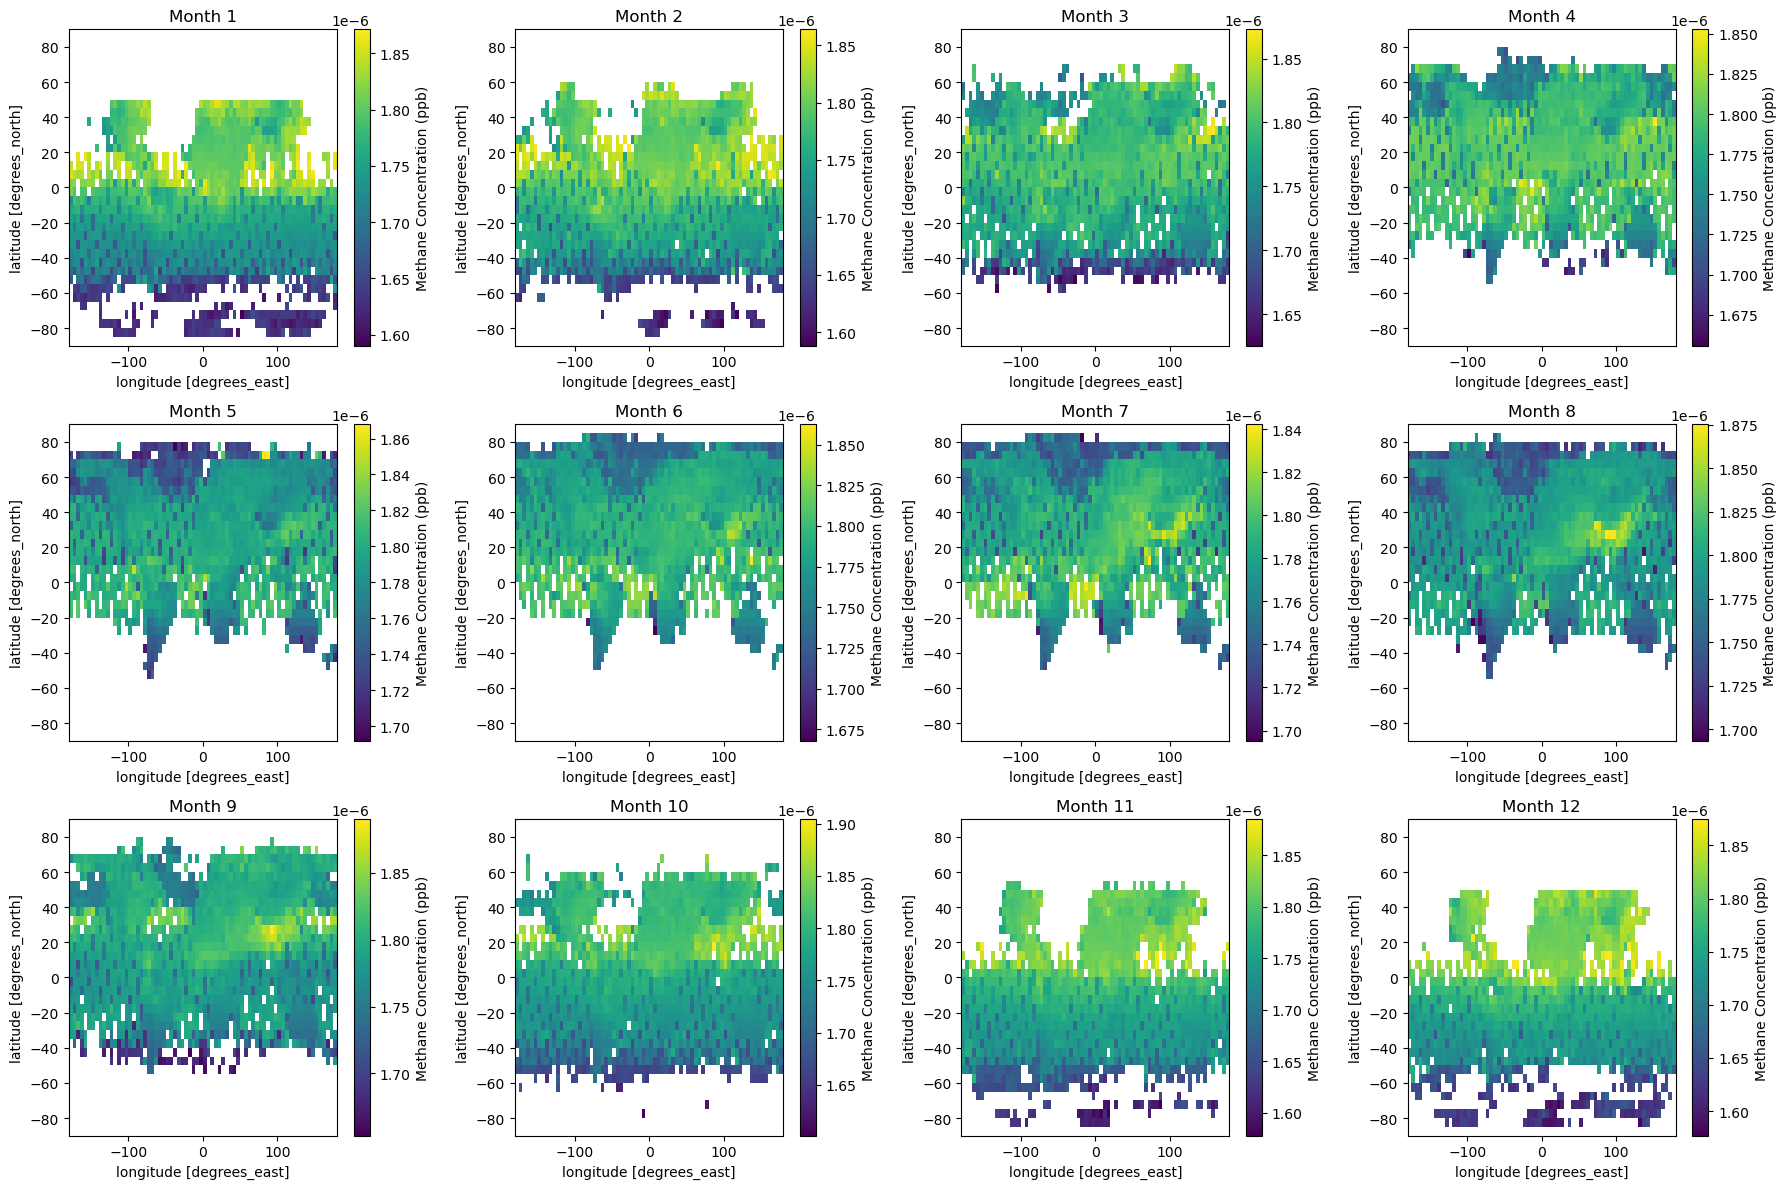

In [1]:
# Load modules
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

# Open a netCDF4 file
ds = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")

# Extract the methane data (xch4) and time
methane_data = ds['xch4']
time_data = ds['time']

# Convert time to pandas datetime for easier handling
time_data = time_data.to_index()

# Add a 'month' attribute to the time data
methane_data.coords['month'] = time_data.month

# Compute the monthly climatology by averaging over all years
monthly_climatology = methane_data.groupby('month').mean('time')

# Plotting the results: 12 panels for each month
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # 3 rows, 4 columns
axes = axes.flatten()

for month in range(12):
    ax = axes[month]
    month_data = monthly_climatology.sel(month=month + 1)  # months are 1-12
    month_data.plot(ax=ax, cmap='viridis', cbar_kwargs={'label': 'Methane Concentration (ppb)'})
    ax.set_title(f'Month {month + 1}')

plt.tight_layout()
plt.show()

1.2 [5 points] Plot globally-averaged methane from 2003-01 to 2020-06 as a time series. Describe your results. Check your plot with this one.

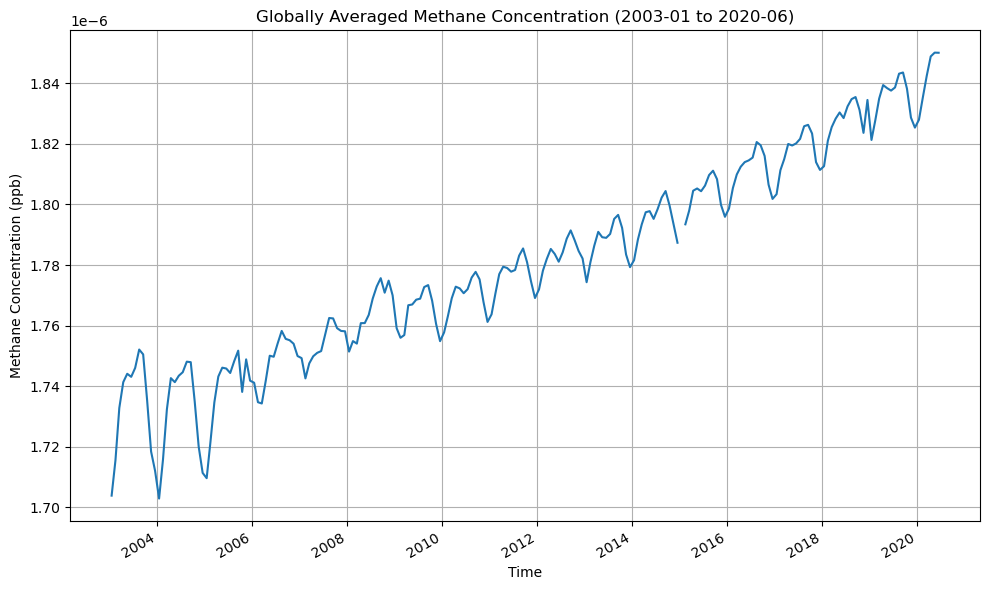

In [3]:
# Compute the global average methane concentration for each time step
global_methane = methane_data.mean(dim=['lat', 'lon'])

# Plot the globally-averaged methane time series
plt.figure(figsize=(10, 6))
global_methane.plot()
plt.title('Globally Averaged Methane Concentration (2003-01 to 2020-06)')
plt.xlabel('Time')
plt.ylabel('Methane Concentration (ppb)')
plt.grid(True)
plt.tight_layout()
plt.show()

1.3 [5 points] Plot deseasonalized methane levels at point [15°S, 150°W] from 2003-01 to 2020-06 as a time series.

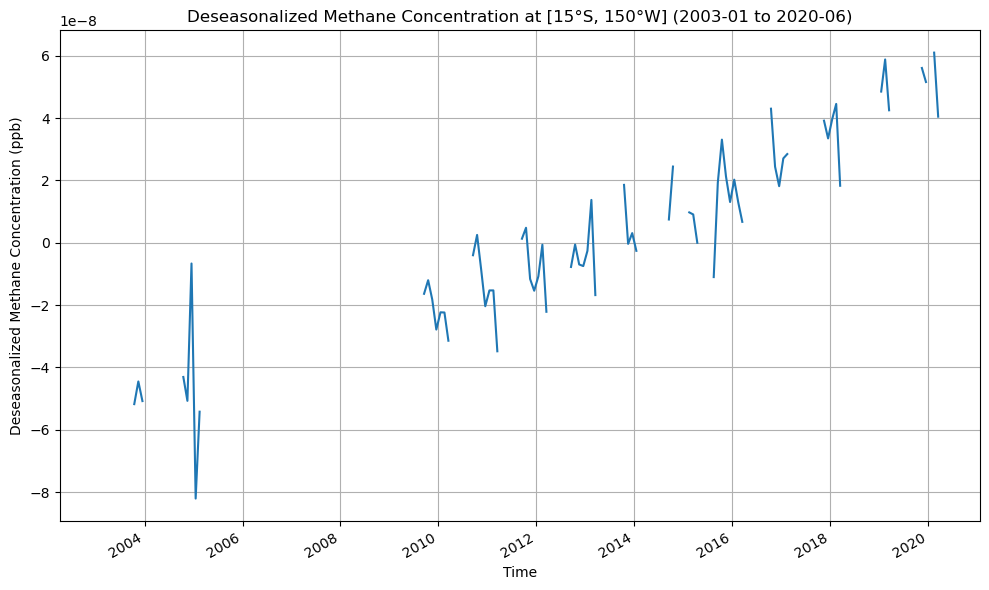

In [5]:
# Select the point [15°S, 150°W], which corresponds to lat=-15, lon=-150
point_methane = methane_data.sel(lat=-15, lon=-150, method='nearest')

# Compute the seasonal cycle: average methane concentration for each month
seasonal_cycle = point_methane.groupby('time.month').mean('time')

# Compute the deseasonalized methane levels by subtracting the seasonal cycle from the original data
deseasonalized_methane = point_methane - seasonal_cycle.sel(month=point_methane.time.dt.month)

# Plot the deseasonalized methane time series
plt.figure(figsize=(10, 6))
deseasonalized_methane.plot()
plt.title('Deseasonalized Methane Concentration at [15°S, 150°W] (2003-01 to 2020-06)')
plt.xlabel('Time')
plt.ylabel('Deseasonalized Methane Concentration (ppb)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Describe your results.
结果显示：随着时间的推移，某地去季节化甲烷浓度的变化趋势为呈螺旋化增长，表明空气中的甲烷含量逐渐增加。

2. Niño 3.4 index
The Niño 3.4 anomalies may be thought of as representing the average equatorial sea surface temperatures (SSTs) across the Pacific from about the dateline to the South American coast (5N-5S, 170W-120W). The Niño 3.4 index typically uses a 3-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.5°C for a period of 5 months or more. Check Equatorial Pacific Sea Surface Temperatures for more about the Niño 3.4 index.

In this problem set, you will use the sea surface temperature (SST) data from NOAA. Download the netCDF4 file (NOAA_NCDC_ERSST_v3b_SST.nc) here.

2.1 [10 points] Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [11]:
# Load modules
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

# Open a netCDF4 file
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

# Extract the Niño 3.4 region (5N-5S, 170W-120W)
sst = ds['sst']
lat = ds['lat']
lon = ds['lon']
time = ds['time']

# Slice the SST for the Niño 3.4 region
niño34_sst = sst.sel(lat=slice(-5, 5), lon=slice(190, 240))

# Compute the monthly climatology by averaging across all years (time dimension)
monthly_climatology = niño34_sst.groupby('time.month').mean(dim='time')

# Now, calculate the SST anomalies by subtracting the monthly climatology from the original SST data
sst_anomalies = niño34_sst - monthly_climatology.sel(month=niño34_sst['time.month'])

# Inspect the result
print(sst_anomalies)

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.43157768, -0.41846275, -0.39795303, ..., -0.2116642 ,
         -0.23776245, -0.24401474],
        [-0.41259003, -0.4067192 , -0.3875141 , ..., -0.52064896,
         -0.5346451 , -0.51997185],
        [-0.40932274, -0.39743805, -0.36237717, ..., -0.6373882 ,
         -0.6171951 , -0.583725  ],
        [-0.4140854 , -0.37909317, -0.3215618 , ..., -0.43292618,
         -0.38404274, -0.3352623 ],
        [-0.5043678 , -0.43894005, -0.3710251 , ..., -0.17453575,
         -0.11044502, -0.06918144]],

       [[-0.5374584 , -0.52739716, -0.50823593, ..., -0.40254593,
         -0.44382668, -0.45287704],
        [-0.55093956, -0.539135  , -0.51673317, ..., -0.6660595 ,
         -0.7127285 , -0.710968  ],
        [-0.61242104, -0.5959244 , -0.5572338 , ..., -0.7235069 ,
         -0.7326374 , -0.73106194],
        [-0.6798363 , -0.6483364 , -0.5889931 , ..., -0.5397434 ,
         -0.50793266, -0.49977684],
        [-0.7830448 , -0.7

1.2 [10 points] Visualize the computed Niño 3.4. Your plot should look similar to this one.

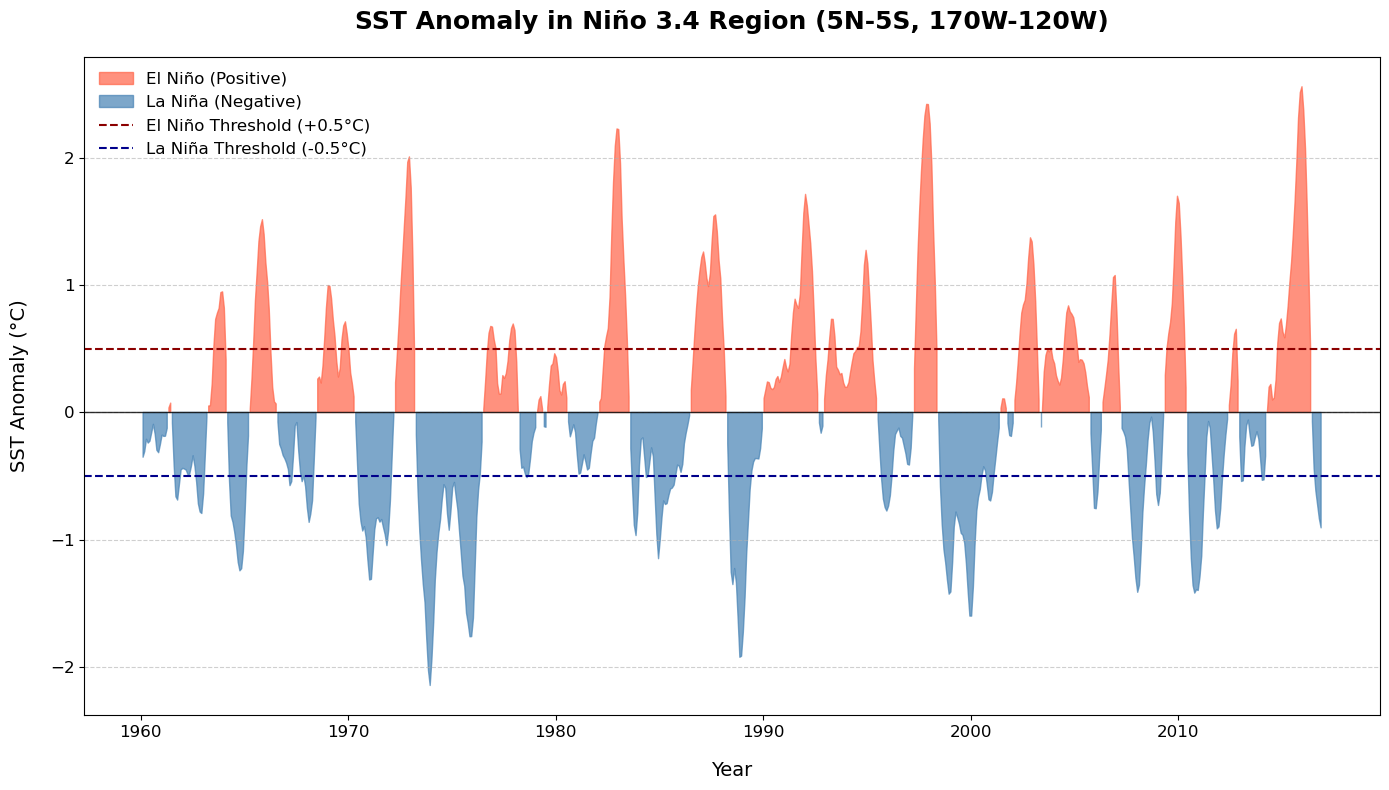

In [17]:
# Compute the Niño 3.4 index (average over lat/lon dimensions)
niño34_index = sst_anomalies.mean(dim=['lat', 'lon'])

# Apply a 3-month running mean
niño34_3month_mean = niño34_index.rolling(time=3, center=True).mean()

# Plot the anomalies
plt.figure(figsize=(14, 8))

# Positive anomalies (El Niño)
plt.fill_between(
    time, niño34_3month_mean, 0,
    where=niño34_3month_mean >= 0,
    color="#FF6347", alpha=0.7, label="El Niño (Positive)"
)

# Negative anomalies (La Niña)
plt.fill_between(
    time, niño34_3month_mean, 0,
    where=niño34_3month_mean < 0,
    color="#4682B4", alpha=0.7, label="La Niña (Negative)"
)

# Add threshold lines
plt.axhline(0.5, color="darkred", linestyle="--", label="El Niño Threshold (+0.5°C)")
plt.axhline(-0.5, color="darkblue", linestyle="--", label="La Niña Threshold (-0.5°C)")

# Add zero line
plt.axhline(0, color="black", linewidth=1, alpha=0.8)

# Customize the plot
plt.title("SST Anomaly in Niño 3.4 Region (5N-5S, 170W-120W)", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Year", fontsize=14, labelpad=15)
plt.ylabel("SST Anomaly (°C)", fontsize=14, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(loc="upper left", fontsize=12, frameon=False)
plt.tight_layout()
plt.show()

3. Explore a netCDF dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format, and have temporal information.

3.1 [5 points] Plot a time series of a certain variable with monthly seasonal cycle removed.

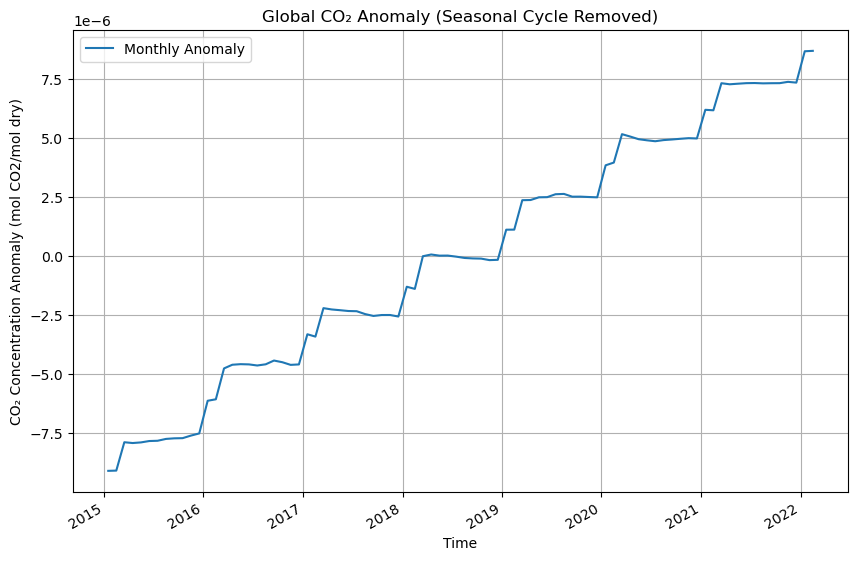

In [29]:
import xarray as xr
import glob
import matplotlib.pyplot as plt

# Define the file path pattern
file_pattern = 'D:\\jupyter\\output_file\\*.nc4' 

# Get all matching file paths
files = glob.glob(file_pattern)

# Read and combine multiple files
ds = xr.open_mfdataset(files, combine='by_coords')

# Calculate the monthly mean (deseasonalize)
monthly_mean = ds['XCO2'].groupby('time.month').mean('time')

# Calculate anomalies (removing seasonal cycles)
anomaly = ds['XCO2'].groupby('time.month') - monthly_mean

# Calculate global average CO2 concentration
global_anomaly = anomaly.mean(dim=['lat', 'lon'])

# Plot the deseasonalized time series
plt.figure(figsize=(10, 6))
global_anomaly.plot(label='Monthly Anomaly')
plt.title('Global CO₂ Anomaly (Seasonal Cycle Removed)')
plt.xlabel('Time')
plt.ylabel('CO₂ Concentration Anomaly (mol CO2/mol dry)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
3.2 [10 points] Make at least 5 different plots using the dataset.

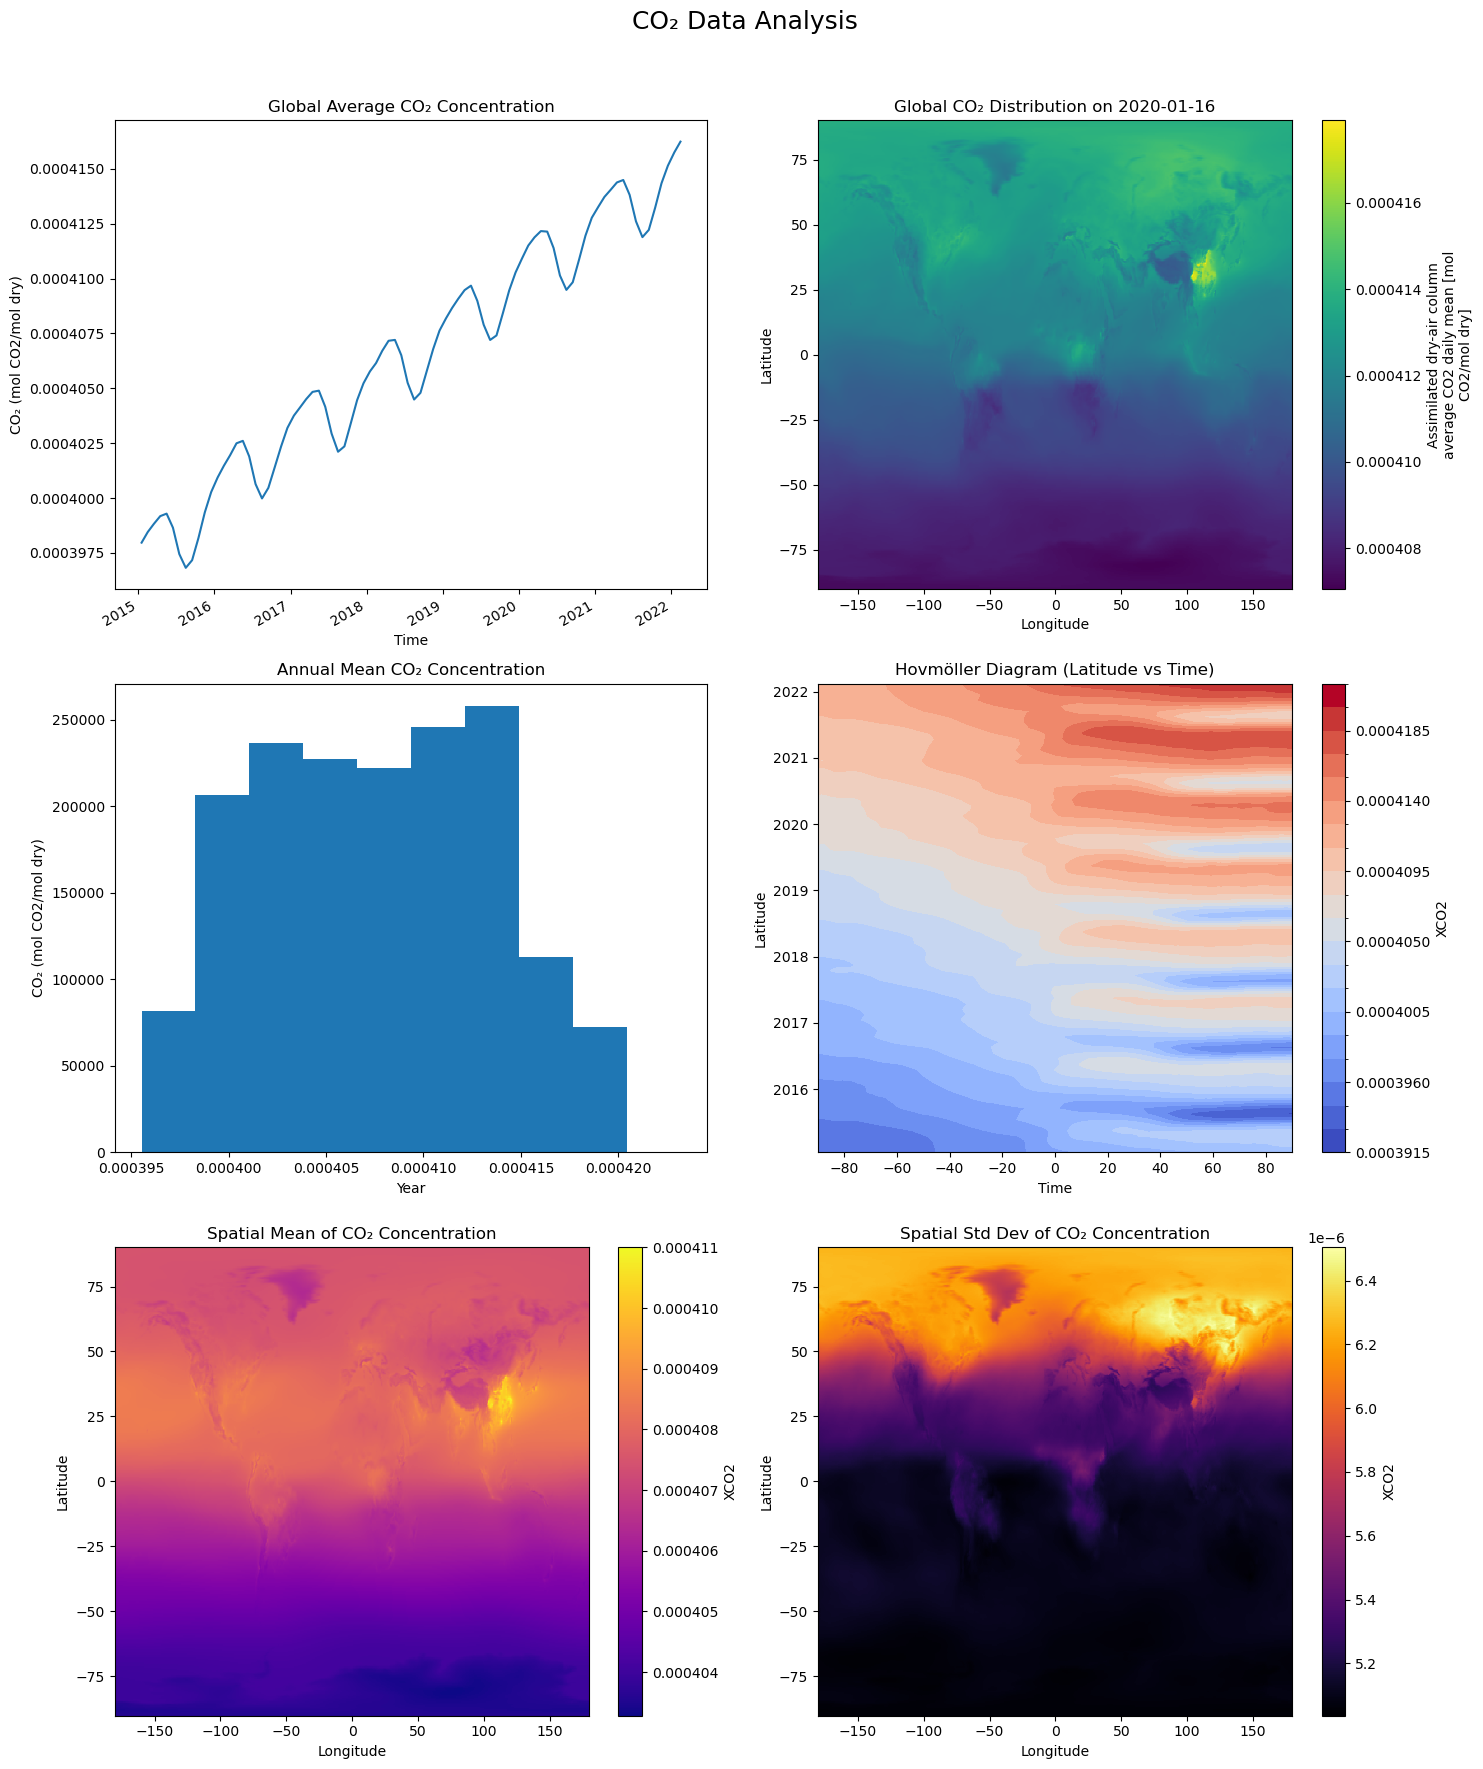

In [25]:
# Calculate the monthly mean (deseasonalize)
monthly_mean = ds['XCO2'].groupby('time.month').mean('time')

# Calculate anomalies (removing seasonal cycles)
anomaly = ds['XCO2'].groupby('time.month') - monthly_mean

# Create a figure with 5 subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('CO₂ Data Analysis', fontsize=18)

# Plot 1: Global average CO₂ concentration time series
global_mean = ds['XCO2'].mean(dim=['lat', 'lon'])
global_mean.plot(ax=axes[0, 0])
axes[0, 0].set_title('Global Average CO₂ Concentration')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('CO₂ (mol CO2/mol dry)')

# Plot 2: Global CO₂ spatial distribution at a specific time
selected_time = '2020-01-16'
ds['XCO2'].sel(time=selected_time).plot(ax=axes[0, 1], cmap='viridis')
axes[0, 1].set_title(f'Global CO₂ Distribution on {selected_time}')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].set_ylabel('Latitude')

# Plot 3: Annual CO₂ concentration trend
annual_mean = ds['XCO2'].groupby('time.year').mean()
annual_mean.plot(ax=axes[1, 0])
axes[1, 0].set_title('Annual Mean CO₂ Concentration')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('CO₂ (mol CO2/mol dry)')

# Plot 4: Hovmöller diagram (latitude vs time)
hovmoller = ds['XCO2'].mean(dim='lon')
hovmoller.plot.contourf(ax=axes[1, 1], levels=20, cmap='coolwarm')
axes[1, 1].set_title('Hovmöller Diagram (Latitude vs Time)')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Latitude')

# Plot 5: Spatial mean and standard deviation of CO₂
spatial_mean = ds['XCO2'].mean(dim='time')
spatial_std = ds['XCO2'].std(dim='time')

spatial_mean.plot(ax=axes[2, 0], cmap='plasma')
axes[2, 0].set_title('Spatial Mean of CO₂ Concentration')
axes[2, 0].set_xlabel('Longitude')
axes[2, 0].set_ylabel('Latitude')

spatial_std.plot(ax=axes[2, 1], cmap='inferno')
axes[2, 1].set_title('Spatial Std Dev of CO₂ Concentration')
axes[2, 1].set_xlabel('Longitude')
axes[2, 1].set_ylabel('Latitude')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()